In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv(r"C:\Users\jithi\Desktop\Vinu DSA\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Make PassengerId as the index column
data.set_index('PassengerId',inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
#Check the basic details of the dataset

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [72]:
data.shape

(891, 11)

In [51]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [52]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [53]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
#Fill in all the missing values present in all the columns in the dataset


In [55]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [56]:
#177 values from age ,2 from Embarked and 687 from cabin.

In [57]:
data.fillna({'Age':data['Age'].median(),'Embarked':data['Embarked'].mode()[0],'Cabin':data['Cabin'].mode()[0]},inplace=True)


In [58]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [59]:
#Check and handle outliers in at least 3 columns in the dataset


Text(0.5, 1.0, 'Boxplot of Age')

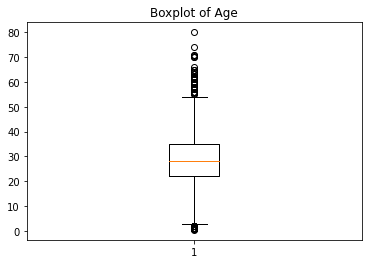

In [60]:
plt.boxplot(data['Age'])
plt.title('Boxplot of Age')

Text(0.5, 1.0, 'Fare')

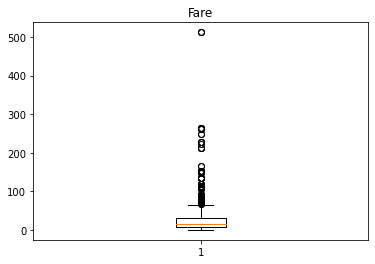

In [61]:
plt.boxplot(data['Fare'])
plt.title('Fare')

Text(0.5, 1.0, 'SibSp')

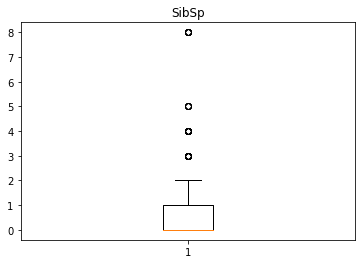

In [62]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')

In [63]:
#here we can see outliners are high in case of age and fare.

In [64]:
#Handling outliners

In [65]:
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
w_wd = 1.5
lr_w = Q1 - (w_wd*IQR)
up_w = Q3 + (w_wd*IQR)
data['Fare']=np.where(data['Fare']>up_w,up_w,np.where(data['Fare']<lr_w,lr_w,data['Fare']))

Text(0.5, 1.0, 'Fare')

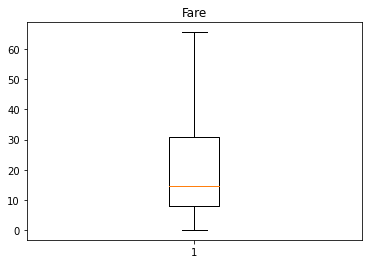

In [66]:
plt.boxplot(data['Fare'])
plt.title('Fare')

In [67]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
w_wd = 1.5
lr_w = Q1 - (w_wd*IQR)
up_w = Q3 + (w_wd*IQR)
data['Age']=np.where(data['Age']>up_w,up_w,np.where(data['Age']<lr_w,lr_w,data['Age']))

Text(0.5, 1.0, 'Age')

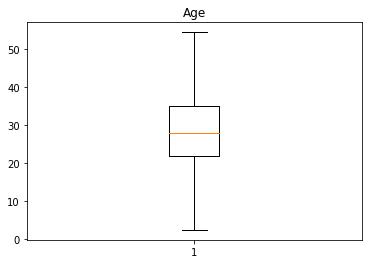

In [68]:
plt.boxplot(data['Age'])
plt.title('Age')

In [69]:
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
w_wd = 1.5
lr_w = Q1 - (w_wd*IQR)
up_w = Q3 + (w_wd*IQR)
data['SibSp']=np.where(data['SibSp']>up_w,up_w,np.where(data['SibSp']<lr_w,lr_w,data['SibSp']))

Text(0.5, 1.0, 'SibSp')

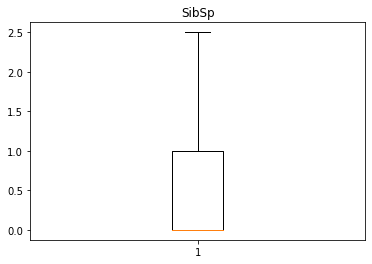

In [70]:
plt.boxplot(data['SibSp'])
plt.title('SibSp')

In [73]:
#there are no outliners now

In [74]:
#Do min max scaling on the feature set (Take ‘Survived’ as target)

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [82]:
X = pd.DataFrame(data['Survived'])
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
X = min_max.fit_transform(X)
X= pd.DataFrame(X)
X.describe()

,0
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
